In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from scipy.misc import toimage

Using TensorFlow backend.


In [2]:
#Load Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Inputs From 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Encoded Outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [3]:
def AdaGradExperiment(lrate,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test):
    
    training_accuracy = []
    testing_accuracy = []
    training_loss = []
    testing_loss = []
    
    #Model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #Adagrad Tuning
    adagrad = optimizers.Adam(lr=lrate, epsilon=epsilonvalue, decay=decayvalue)
    model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
    
    #Training and Fitting
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
    scores = model.evaluate(X_test, y_test, verbose=0)
    acc = print("Accuracy: %.2f%%" % (scores[1]*100))
    training_accuracy.append(history.history['acc'])
    testing_accuracy.append(history.history['val_acc'])
    training_loss.append(history.history['loss'])
    testing_loss.append(history.history['val_loss'])
    
    return training_accuracy,testing_accuracy,training_loss,testing_loss


In [4]:
tr_acc_main = []
ts_acc_main = []
tr_ls_main = []
ts_ls_main = []
learningrates = [0.001,0.0005,0.0001,0.00005]
epsilonvalue = 1e-7
decayvalue = 0
epochs = 30

for lrate in learningrates:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdaGradExperiment(lrate,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main.append(tr_acc)
    ts_acc_main.append(ts_acc)
    tr_ls_main.append(tr_ls)
    ts_ls_main.append(ts_ls)    

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s - loss: 1.6650 - acc: 0.3745 - val_loss: 1.3165 - val_acc: 0.5150
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.2294 - acc: 0.5559 - val_loss: 1.1337 - val_acc: 0.6048
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.0383 - acc: 0.6314 - val_loss: 0.9508 - val_acc: 0.6675
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 0.9290 - acc: 0.6739 - val_loss: 0.8728 - val_acc: 0.6976
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 0.8540 - acc: 0.6985 - val_loss: 0.8020 - val_acc: 0.7159
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.7987 - acc: 0.7188 - val_loss: 0.7554 - val_acc: 0.7345
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.7576 - acc: 0.7368 - val_loss: 0.7746 - val_acc: 0.7295
Epoch 8/30
50000/50000 [==============================

50000/50000 [==============================] - 12s - loss: 1.2307 - acc: 0.5554 - val_loss: 1.1662 - val_acc: 0.5898
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1070 - acc: 0.6048 - val_loss: 1.0237 - val_acc: 0.6474
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 0.9971 - acc: 0.6458 - val_loss: 0.9490 - val_acc: 0.6679
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.9128 - acc: 0.6784 - val_loss: 0.8927 - val_acc: 0.6923
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.8449 - acc: 0.7027 - val_loss: 0.8323 - val_acc: 0.7093
Epoch 8/30
50000/50000 [==============================] - 12s - loss: 0.7809 - acc: 0.7260 - val_loss: 0.8106 - val_acc: 0.7187
Epoch 9/30
50000/50000 [==============================] - 12s - loss: 0.7288 - acc: 0.7456 - val_loss: 0.7478 - val_acc: 0.7391
Epoch 10/30
50000/50000 [==============================] - 12s - loss: 0.6748 - acc: 0.7605 - val_loss: 0.7396 - va

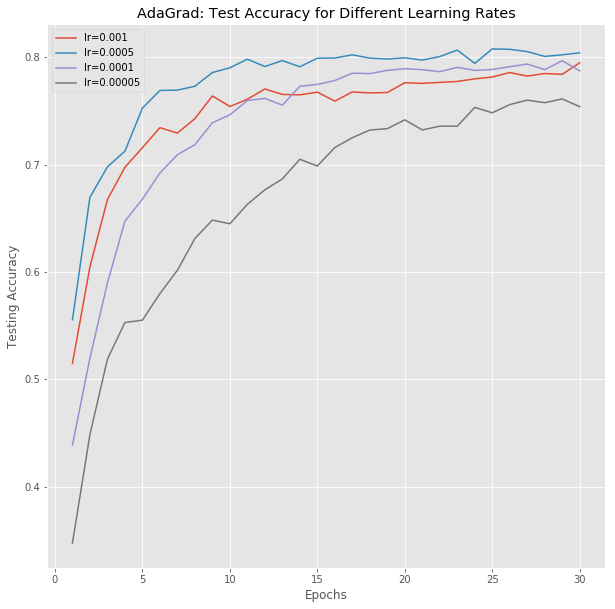

In [6]:
#Plotting Testing Accuracy for different Learning Rates
import matplotlib.pyplot as plt
import numpy as np
num = []
for i in range(30):
    num.append(i+1)
    
num = np.asarray(num)


plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("AdaGrad: Test Accuracy for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
plt.plot(num,np.array(ts_acc_main[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_acc_main[1]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_acc_main[2]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_acc_main[3]).T,mfc='b',label="lr=0.00005")
plt.legend(loc="best")

plt.show()

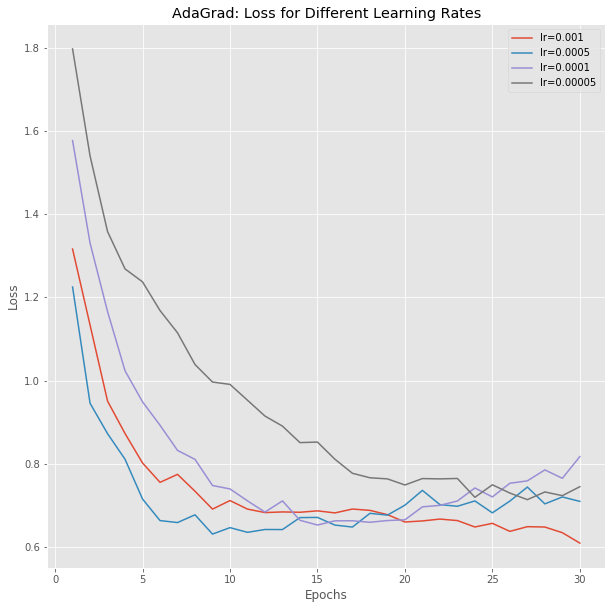

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("AdaGrad: Loss for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_ls_main[1]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_ls_main[2]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_ls_main[3]).T,mfc='b',label="lr=0.00005")
plt.legend(loc="best")

plt.show()

In [13]:
tr_acc_main1 = []
ts_acc_main1 = []
tr_ls_main1 = []
ts_ls_main1 = []
learningrates = [0.001,0.0005]
epsilonvalue = 1e-7
epochs = 30

decayvalue = 0.00001
for lrate in learningrates:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdaGradExperiment(lrate,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main1.append(tr_acc)
    ts_acc_main1.append(ts_acc)
    tr_ls_main1.append(tr_ls)
    ts_ls_main1.append(ts_ls)    

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s - loss: 1.6684 - acc: 0.3765 - val_loss: 1.3538 - val_acc: 0.5131
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.2759 - acc: 0.5388 - val_loss: 1.1337 - val_acc: 0.5871
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.1092 - acc: 0.6047 - val_loss: 1.0362 - val_acc: 0.6320
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 0.9942 - acc: 0.6496 - val_loss: 0.9032 - val_acc: 0.6846
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 0.9222 - acc: 0.6748 - val_loss: 0.8668 - val_acc: 0.6961
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.8539 - acc: 0.6988 - val_loss: 0.8704 - val_acc: 0.6984
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.8108 - acc: 0.7158 - val_loss: 0.7693 - val_acc: 0.7319
Epoch 8/30
50000/50000 [==============================

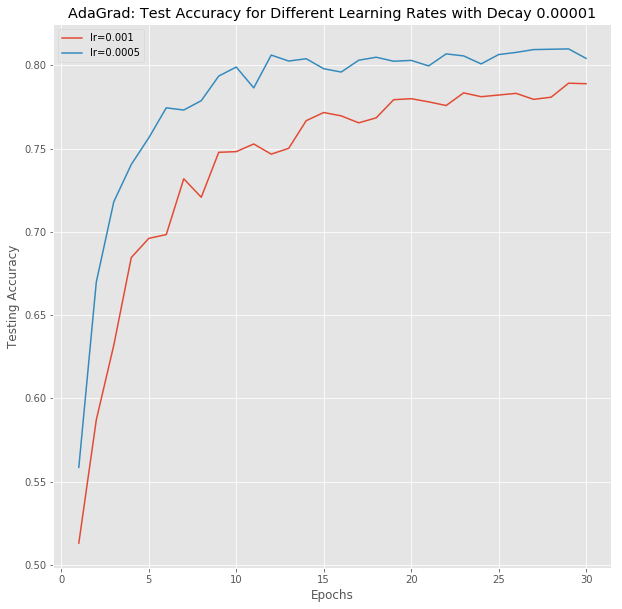

In [16]:
#Plotting Testing Accuracy for different Learning Rates
import matplotlib.pyplot as plt
import numpy as np
num = []
for i in range(30):
    num.append(i+1)
    
num = np.asarray(num)


plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("AdaGrad: Test Accuracy for Different Learning Rates with Decay 0.00001")
plt.xlabel("Epochs"), 
plt.ylabel("Testing Accuracy")
plt.plot(num,np.array(ts_acc_main1[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_acc_main1[1]).T,mfc='b',label="lr=0.0005")
#plt.plot(num,np.array(ts_acc_main1[2]).T,mfc='b',label="lr=0.0001")
#plt.plot(num,np.array(ts_acc_main1[3]).T,mfc='b',label="lr=0.00005")
plt.legend(loc="best")

plt.show()

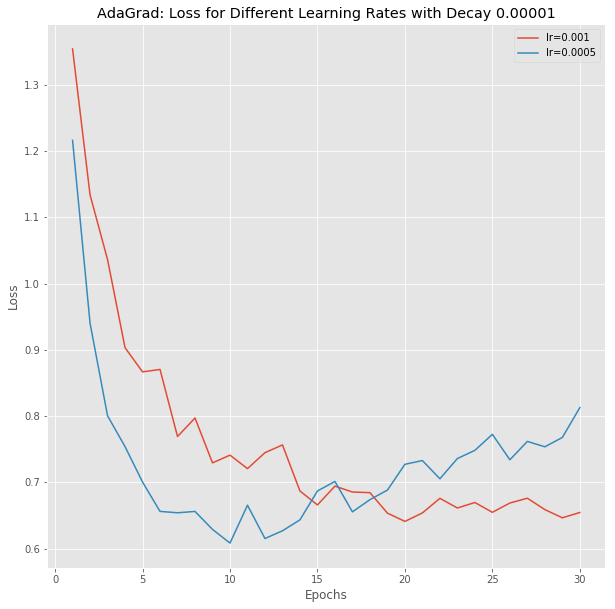

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("AdaGrad: Loss for Different Learning Rates with Decay 0.00001")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main1[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_ls_main1[1]).T,mfc='b',label="lr=0.0005")

plt.legend(loc="best")

plt.show()